In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error  # use this instead of root_mean_squared_error


## Description 

In [2]:
df = pd.read_csv(r"F:\My_CSV_\Hous_price_regression Task\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hause_df = df.copy()
hause_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [80]:
import pandas as pd

# Display all rows when printing Series or DataFrames
pd.set_option('display.max_rows', None)

# Example: show missing values per column
missing_values = hause_df.isnull().sum()
print(missing_values)


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
hause_df = hause_df.drop(columns = ['Alley','MiscFeature', 'Fence', 'PoolQC', 'MasVnrType', 'FireplaceQu','Id'], axis  = 1)
#hause_df = hause_df.drop(columns = ['Id'], axis  = 1)

In [84]:
pd.reset_option('display.max_rows')


In [5]:
hause_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [86]:
hause_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [108]:
hause_df['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

In [6]:
X = hause_df
y = X.pop('SalePrice')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [8]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.impute import SimpleImputer

# Enable pandas output for transformers
set_config(transform_output="pandas")

# ==== 1. Define Features ====
ord_feat = [
    'ExterQual', 'KitchenQual', 'ExterCond', 'BsmtQual', 'SaleCondition', 'SaleType',
    'PavedDrive', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'Functional',
    'Electrical', 'HeatingQC', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'LotShape',
    'LandSlope', 'LandContour', 'OverallQual', 'OverallCond', 'CentralAir', 'Utilities', 'Condition1',
    'Condition2', 'GarageCars', 'Fireplaces', 'FullBath', 'HalfBath', 'TotRmsAbvGrd'
]

# One-hot encode all other non-numeric features
cat_feat_all = X.select_dtypes(exclude="number").columns
oh_feat = list(set(cat_feat_all) - set(ord_feat))

# Remove ordinals from numeric features to avoid conflict
X_num = X.select_dtypes(include='number').columns
X_num = [col for col in X_num if col not in ord_feat]

# Combine categorical features
cat_feat = ord_feat + oh_feat

# ==== 2. Preprocessing Steps ====

# Numerical pipeline
scaler = MinMaxScaler()
num_imputer = SimpleImputer(strategy='mean')
pip_num = make_pipeline(num_imputer, scaler)

# Categorical pipeline
cat_imputer = SimpleImputer(strategy='constant', fill_value='N_A')
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Custom ordering for OrdinalEncoder
categories = [
    ['Gd', 'TA', 'Ex', 'Fa'],  # ExterQual
    ['Gd', 'TA', 'Ex', 'N_A', 'Fa'],  # KitchenQual
    ['TA', 'Gd', 'Fa', 'Po', 'Ex'],  # ExterCond
    ['Gd', 'TA', 'Ex', 'Fa'],  # BsmtQual
    ['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],  # SaleCondition
    ['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],  # SaleType
    ['Y', 'N', 'P'],  # PavedDrive
    ['TA', 'Fa', 'N_A', 'Gd', 'Po', 'Ex'],  # GarageCond
    ['TA', 'Fa', 'Gd', 'N_A', 'Ex', 'Po'],  # GarageQual
    ['RFn', 'Unf', 'Fin', 'N_A'],  # GarageFinish
    ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'N_A', 'Basment', '2Types'],  # GarageType
    ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],  # Functional
    ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'N_A'],  # Electrical
    ['Ex', 'Gd', 'TA', 'Fa', 'Po'],  # HeatingQC
    ['Unf', 'BLQ', 'N_A', 'ALQ', 'Rec', 'LwQ', 'GLQ'],  # BsmtFinType2
    ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'N_A', 'LwQ'],  # BsmtFinType1
    ['No', 'Gd', 'Mn', 'Av', 'N_A'],  # BsmtExposure
    ['TA', 'Gd', 'N_A', 'Fa', 'Po'],  # BsmtCond
    ['Reg', 'IR1', 'IR2', 'IR3'],  # LotShape
    ['Gtl', 'Mod', 'Sev'],  # LandSlope
    ['Lvl', 'Bnk', 'Low', 'HLS'],  # LandContour
    [7, 6, 8, 5, 9, 4, 10, 3, 1, 2],  # OverallQual
    [5, 8, 6, 7, 4, 2, 3, 9, 1],  # OverallCond
    ['Y', 'N'],  # CentralAir
    ['AllPub', 'NoSeWa'],  # Utilities
    ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'],  # Condition1
    ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],  # Condition2
    [2, 3, 1, 0, 4],  # GarageCars
    [0, 1, 2, 3],  # Fireplaces
    [2, 1, 3, 0],  # FullBath
    [1, 0, 2],  # HalfBath
    [8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14],  # TotRmsAbvGrd
]

# Ordinal encoder
ord_encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Column transformer for categorical variables
encoder = make_column_transformer(
    (ord_encoder, ord_feat),
    (one_hot, oh_feat),
    verbose_feature_names_out=False
)

cat_pipe = make_pipeline(cat_imputer, encoder)

# Final preprocessor: numeric + categorical
preprocessor = make_column_transformer(
    (pip_num, X_num),
    (cat_pipe, cat_feat),
    verbose_feature_names_out=False
)

# Show preprocessor summary
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'BsmtHalfBath', 'BedroomAbv...
                                  'PavedDrive', 'GarageCond', 'GarageQual',
                                  'GarageFinish', 'GarageType', 'Functional',
                                  'Electrical', 'HeatingQC', 'BsmtFinType2',
                                  'BsmtFinType1', 'BsmtExposure', 'BsmtCond',
                                  'LotShape', 'LandSlope', 'LandContour',
                                  'OverallQual', 'OverallCond', 'CentralAir',
                                  'Utilities', 'Condition1', 'Condition2',
                                  'GarageCars', 'Fireplaces', 'FullBath', ...])],
                  verbose_feature_names_out=False)

In [9]:
preprocessor.fit_transform(X_train)

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
503,0.000000,0.270548,0.086559,0.630435,0.783333,0.000000,0.220943,0.000000,0.108733,0.245663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87,0.823529,0.065068,0.015161,0.992754,0.983333,0.047500,0.000000,0.000000,0.261986,0.100164,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
500,0.823529,0.000000,0.002531,0.731884,0.383333,0.178125,0.063076,0.000000,0.135274,0.109984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1332,0.000000,0.157534,0.045348,0.478261,0.133333,0.000000,0.122254,0.000000,0.053938,0.133552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
658,0.176471,0.195205,0.098209,0.550725,0.000000,0.000000,0.000000,0.000000,0.390411,0.149264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,0.588235,0.150685,0.044686,0.985507,0.966667,0.478750,0.272856,0.000000,0.069349,0.278560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1077,0.000000,0.168293,0.088202,0.702899,0.316667,0.000000,0.013288,0.536635,0.098459,0.179378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1318,0.000000,0.168293,0.081528,0.934783,0.866667,0.111250,0.000000,0.000000,0.750428,0.286907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
723,0.176471,0.133562,0.041028,0.594203,0.366667,0.000000,0.000000,0.000000,0.402825,0.154010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
preprocessor.transform(X_test)

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
605,0.235294,0.219178,0.074291,0.673913,0.666667,0.110000,0.080439,0.0,0.134418,0.125696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
642,0.352941,0.184932,0.075884,0.724638,0.750000,0.000000,0.249823,0.0,0.232021,0.319476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
993,0.235294,0.160959,0.045158,0.963768,0.933333,0.000000,0.000000,0.0,0.321062,0.122750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
736,0.411765,0.133562,0.043307,0.565217,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1239,0.000000,0.147260,0.046328,0.971014,0.933333,0.020000,0.075833,0.0,0.448630,0.241571,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.058824,0.202055,0.072820,0.355072,0.933333,0.000000,0.126329,0.0,0.069777,0.143372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
351,0.588235,0.168293,0.023250,0.826087,0.600000,0.000000,0.191708,0.0,0.158818,0.237807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
775,0.588235,0.037671,0.018525,0.913043,0.800000,0.200000,0.153437,0.0,0.144692,0.197054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
809,0.323529,0.236301,0.040586,0.188406,0.250000,0.000000,0.000000,0.0,0.363442,0.138953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
# Fit the preprocessing pipeline


# Transform data (returns DataFrame because you set `set_config(transform_output="pandas")`)


In [222]:
import joblib
joblib.dump(preprocessor, "preprocessor_haus.pkl")

['preprocessor_haus.pkl']

In [91]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler  # Example
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

base_estimator = XGBRegressor(random_state=123)

# Define RFECV
rfecv = RFECV(
    estimator=base_estimator,
    step=1,
    cv=KFold(3),
    scoring=scorer,
    n_jobs=-1
)

# Wrap in TransformedTargetRegressor
log_rfecv = TransformedTargetRegressor(
    regressor=rfecv,
    func=np.log1p,
    inverse_func=np.expm1
)

# Final pipeline
pipe = make_pipeline(
    preprocessor,
    log_rfecv
)

In [92]:
param_dist = {
    'transformedtargetregressor__regressor__estimator__max_depth': [3, 4, 5, 6, 7, 8],
    'transformedtargetregressor__regressor__estimator__learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
    'transformedtargetregressor__regressor__estimator__n_estimators': [50, 100, 200, 300],
    'transformedtargetregressor__regressor__estimator__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'transformedtargetregressor__regressor__estimator__colsample_bytree': [0.6, 0.8, 1.0],
    'transformedtargetregressor__regressor__estimator__gamma': [0, 0.1, 0.2],
    'transformedtargetregressor__regressor__estimator__min_child_weight': [1, 3, 5],
    'transformedtargetregressor__regressor__estimator__reg_alpha': [0, 0.1, 1],
    'transformedtargetregressor__regressor__estimator__reg_lambda': [0.5, 1, 1.5]
}



In [93]:
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring=scorer,
    verbose=1,
    n_jobs=-1,
    random_state=123
)

search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['MSSubClass',
                                                                                'LotFrontage',
                                                                                'LotArea',
                                                                                'YearBuilt',
                                                                                'YearRemodAdd',
                                                                                'MasVnrArea',
                                                                                'BsmtFinSF1',
                                                                                'BsmtFinSF2',
                                                                                'BsmtUnfSF',
                                                                                'TotalBsmtSF',
                                                                                '1stFlrSF',
                                                                                '2ndFlrS...
                                                                                                           100,
                                                                                                           200,
                                                                                                           300],
                                        'transformedtargetregressor__regressor__estimator__reg_alpha': [0,
                                                                                                        0.1,
                                                                                                        1],
                                        'transformedtargetregressor__regressor__estimator__reg_lambda': [0.5,
                                                                                                         1,
                                                                                                         1.5],
                                        'transformedtargetregressor__regressor__estimator__subsample': [0.6,
                                                                                                        0.7,
                                                                                                        0.8,
                                                                                                        0.9,
                                                                                                        1.0]},
                   random_state=123,
                   scoring=make_scorer(log_rmse, greater_is_better=False, response_method='predict'),
                   verbose=1)

In [94]:
search.best_estimator_


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'Bsm...
                                                                                   max_bin=None,
                                                                                   max_cat_threshold=None,
                                                                                   max_cat_to_onehot=None,
                                                                                   max_delta_step=None,
                                                                                   max_depth=6,
                                                                                   max_leaves=None,
                                                                                   min_child_weight=5,
                                                                                   missing=nan,
                                                                                   monotone_constraints=None,
                                                                                   multi_strategy=None,
                                                                                   n_estimators=200,
                                                                                   n_jobs=None,
                                                                                   num_parallel_tree=None,
                                                                                   random_state=123, ...),
                                                            n_jobs=-1,
                                                            scoring=make_scorer(log_rmse, greater_is_better=False, response_method='predict'))))])

In [98]:
search.best_params_

{'transformedtargetregressor__regressor__estimator__subsample': 0.6,
 'transformedtargetregressor__regressor__estimator__reg_lambda': 1.5,
 'transformedtargetregressor__regressor__estimator__reg_alpha': 1,
 'transformedtargetregressor__regressor__estimator__n_estimators': 200,
 'transformedtargetregressor__regressor__estimator__min_child_weight': 5,
 'transformedtargetregressor__regressor__estimator__max_depth': 6,
 'transformedtargetregressor__regressor__estimator__learning_rate': 0.1,
 'transformedtargetregressor__regressor__estimator__gamma': 0.1,
 'transformedtargetregressor__regressor__estimator__colsample_bytree': 0.6}

In [99]:
from xgboost import XGBRegressor

final_xgb = XGBRegressor(**search.best_params_)




In [100]:
import warnings
warnings.filterwarnings('ignore')

# Fit the final model on the training data
final_xgb.fit(X_train_processed, y_train)

# Score on the training data (R^2 by default)
train_score = final_xgb.score(X_train_processed, y_train)

# Score on the test data
test_score = final_xgb.score(X_test_processed, y_test)

print(f"Train R^2 score: {train_score:.4f}")
print(f"Test R^2 score: {test_score:.4f}")


Train R^2 score: 0.9998
Test R^2 score: 0.8516


# TEST

In [101]:
test = pd.read_csv(r"F:\My_CSV_\Hous_price_regression Task\test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [102]:
id_column = test.pop('Id')

In [52]:
id_column

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [103]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# One-hot encode all categorical features
X_encoded = pd.get_dummies(X)

# Transform the target if you're using log1p
y_log = np.log1p(y)

# Fit the final model
final_xgb = XGBRegressor(**search.best_params_)
final_xgb.fit(X_encoded, y_log)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [104]:


# 2. Encode test data using the same method
test_encoded = pd.get_dummies(test)

# 3. Align columns between training and test sets
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# 4. Predict
predictions_log = final_xgb.predict(test_encoded)

# 5. If you used np.log1p(y), remember to reverse the transformation
predictions = np.expm1(predictions_log)


In [105]:
results = pd.DataFrame({
    'Id':id_column,
    'SalePrice':predictions
})

In [106]:
results.to_csv('puyan.csv', index=False)
print("File saved as 'puyan.csv'")


File saved as 'puyan.csv'


In [38]:
from IPython.display import FileLink
FileLink('submission_puyan_rf_1.csv')


C:\Users\win-10\After_Bootcamp_Project\submission_puyan_rf_1.csv

In [107]:
from IPython.display import HTML

HTML('<a href="puyan.csv" download="submission.csv">📥 Download submission.csv</a>')


# DEEP LEARNING PART


In [22]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [23]:
# Convert features to tensor (unchanged)
X_train_tensor = tf.convert_to_tensor(X_train_processed.to_numpy(), dtype=tf.float32)

# Apply log1p transform on target before converting to tensor
y_train_log = np.log1p(y_train)  # log(1 + y) to handle zero prices safely
y_train_tensor = tf.convert_to_tensor(y_train_log, dtype=tf.float32)


In [24]:
print(X_train_tensor.shape)


(1168, 168)


| Task Type                     | Output Layer              | Activation           | Loss Function                                                                                                 | Metrics          |
| ----------------------------- | ------------------------- | -------------------- | ------------------------------------------------------------------------------------------------------------- | ---------------- |
| **Regression**                | `layers.Dense(1)`         | `'linear'` (default) | `'mse'`, `'mae'`                                                                                              | `'mae'`, `'mse'` |
| **Binary Classification**     | `layers.Dense(1)`         | `'sigmoid'`          | `'binary_crossentropy'`                                                                                       | `'accuracy'`     |
| **Multiclass Classification** | `layers.Dense(n_classes)` | `'softmax'`          | `'sparse_categorical_crossentropy'` (for integer labels)<br>`'categorical_crossentropy'` (for one-hot labels) | `'accuracy'`     |


In [106]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, callbacks
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import datetime

# ==== 1. Define Model Architecture ====
model = models.Sequential([
    layers.Input(shape=(X_train_tensor.shape[1],)),
    layers.Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='swish', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='swish', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(32, activation='swish', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),

    layers.Dense(1, activation='linear'),  # Regression output
])

# ==== 2. Compile the Model ====
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0225157)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.Huber(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# ==== 3. Define Callbacks ====
# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    verbose=1
)

# Save the best model
checkpoint_cb = ModelCheckpoint(
    filepath='best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

# TensorBoard logging
log_dir = f"logs/fit/experiment_huber_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

# ==== 4. Train the Model ====
history = model.fit(
    X_train_tensor,
    y_train_tensor,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr, checkpoint_cb, tensorboard_callback],
    verbose=1
)


Epoch 1/50
113/117 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9942 - root_mean_squared_error: 7.1214
Epoch 1: val_loss improved from inf to 0.19460, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.8636 - root_mean_squared_error: 7.0082 - val_loss: 0.1946 - val_root_mean_squared_error: 0.6006 - learning_rate: 0.0225
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0948 - root_mean_squared_error: 0.3939
Epoch 2: val_loss improved from 0.19460 to 0.05706, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0948 - root_mean_squared_error: 0.3938 - val_loss: 0.0571 - val_root_mean_squared_error: 0.2853 - learning_rate: 0.0225
Epoch 3/50
103/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0674 - root_mean_squared_error: 0.3190
Epoch 3: val_loss did not improve from 0.05706
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0677 - root_mean_squared_error: 0.3202 - val_loss: 0.0840 - val_root_mean_squared_error: 0

| Loss Function | Best For                    | Pros                             | Cons                              |
| ------------- | --------------------------- | -------------------------------- | --------------------------------- |
| `MSE`         | Data without outliers       | Smooth, differentiable, standard | Sensitive to outliers             |
| `MAE`         | Data with heavy outliers    | Robust to outliers               | Not smooth (less stable training) |
| `Huber`       | Data with **some** outliers | Combines MSE and MAE benefits    | Has a tunable `delta`             |


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


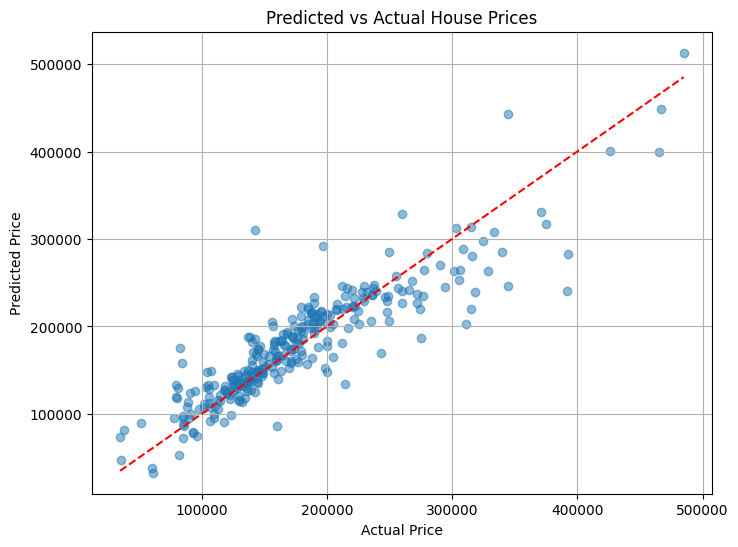

RMSE: 32271.46
MAE: 22048.09
R² Score: 0.8104


In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf

X_test_tensor = tf.convert_to_tensor(X_test_processed, dtype=tf.float32)

# === 1. Predict ===
y_pred_log = model.predict(X_test_tensor).flatten()  # Predicted in log scale (if trained on log1p)
y_pred = np.expm1(y_pred_log)  # Reverse log1p

# === 2. Get Actual Labels ===
y_true = y_test.values.flatten()  # Original prices (not in log)

# === 3. Plot Predicted vs Actual ===
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.show()

# === 4. Print Metrics ===
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


<Axes: title={'center': 'Training vs Validation Loss'}>

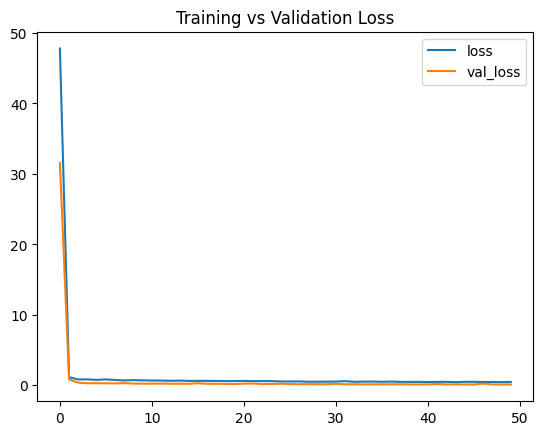

In [40]:
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(title="Training vs Validation Loss")


In [81]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, callbacks
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import datetime

# ==== 1. Define Model Architecture ====
model = models.Sequential([
    layers.Input(shape=(X_train_tensor.shape[1],)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),

    layers.Dense(1, activation='linear'),  # Regression output
])

# ==== 2. Compile the Model ====
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0225)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.Huber(),  # More robust than MSE
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# ==== 3. Define Callbacks ====
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

checkpoint_cb = ModelCheckpoint(
    filepath='best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

log_dir = f"logs/fit/experiment_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

# ==== 4. Train the Model ====
history = model.fit(
    X_train_tensor,
    y_train_tensor,
    epochs=50,  # More room to learn, early stopping handles overfitting
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr, checkpoint_cb, tensorboard_callback],
    verbose=1
)


Epoch 1/50
104/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0018 - root_mean_squared_error: 7.0624
Epoch 1: val_loss improved from inf to 0.56055, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 4.6246 - root_mean_squared_error: 6.7345 - val_loss: 0.5606 - val_root_mean_squared_error: 1.2718 - learning_rate: 0.0225
Epoch 2/50
103/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0883 - root_mean_squared_error: 0.3852
Epoch 2: val_loss improved from 0.56055 to 0.04554, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0888 - root_mean_squared_error: 0.3867 - val_loss: 0.0455 - val_root_mean_squared_error: 0.2497 - learning_rate: 0.0225
Epoch 3/50
105/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0805 - root_mean_squared_error: 0.3630
Epoch 3: val_loss did not improve from 0.04554
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0805 - root_mean_squared_error: 0.3632 - val_loss: 0.0472 - val_root_mean_squared_error: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


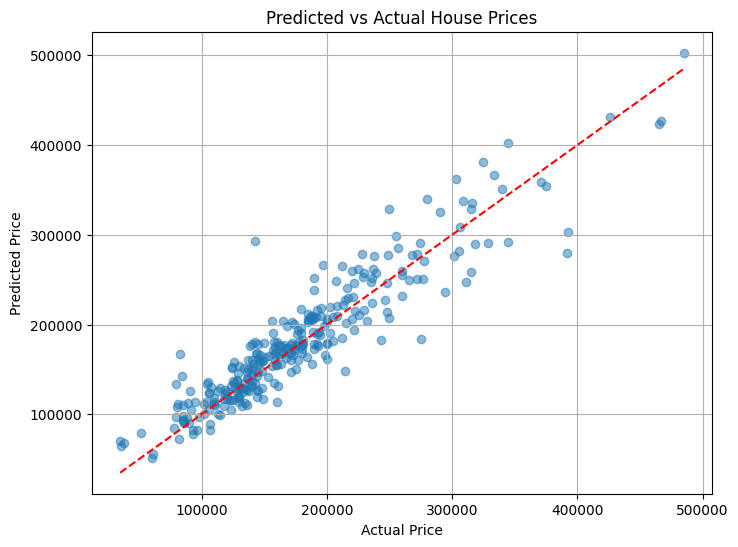

✅ Test RMSE: 27656.54
✅ Test MAE: 20079.90
✅ Test R² Score: 0.8607


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Predict on test set
X_test_tensor = tf.convert_to_tensor(X_test_processed, dtype=tf.float32)
y_pred_log = model.predict(X_test_tensor).flatten()

# 2. Inverse the log1p transform (if used before training)
y_pred = np.expm1(y_pred_log)       # Prediction
y_true = y_test.values.flatten()    # Actual values



# === 3. Plot Predicted vs Actual ===
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.show()

# 4. Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"✅ Test RMSE: {rmse:.2f}")
print(f"✅ Test MAE: {mae:.2f}")
print(f"✅ Test R² Score: {r2:.4f}")


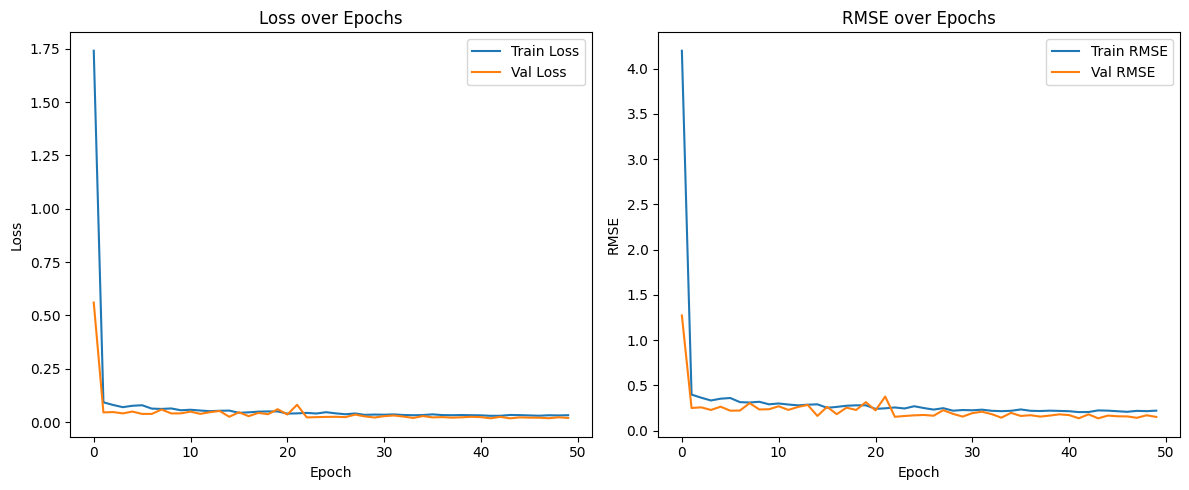

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# --- Loss ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# --- RMSE ---
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.title('RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


In [85]:
test_df = pd.read_csv(r"F:\My_CSV_\Hous_price_regression Task\test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [86]:
import numpy as np
import pandas as pd

# === 1. Get test IDs ===
test_ids = test_df["Id"]

# === 2. Preprocess test data (do NOT fit again) ===
X_kaggle_test_processed = preprocessor.transform(test_df)
X_kaggle_test_tensor = tf.convert_to_tensor(X_kaggle_test_processed.to_numpy(), dtype=tf.float32)

# === 3. Predict (in log space if you trained on log1p(y)) ===
y_kaggle_log_preds = model.predict(X_kaggle_test_tensor)

# === 4. Convert back from log1p scale ===
y_kaggle_preds = np.expm1(y_kaggle_log_preds).squeeze()  # squeeze() removes shape issues

# === 5. Create submission DataFrame ===
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": y_kaggle_preds
})

# === 6. Save as CSV ===
submission.to_csv("submission.csv", index=False)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [87]:
from IPython.display import HTML

HTML('<a href="submission.csv" download="submission.csv">📥 Download submission.csv</a>')
